In [1]:
# IMport Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

import os


import PIL
import tensorflow as tf
import matplotlib.image as image
import seaborn as sns
import pickle 

from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Dense, BatchNormalization
from tensorflow.keras.layers import Flatten
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore')

In [81]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Counting total number of classes
dir_path = r'C:\Users\karri\Documents\A_N_P_R\data\CNN letter Dataset'
digits = sorted(os.listdir(dir_path))
NUM_CLASSES = len(digits)
print(digits)
print('Number of classes (letters and digits): ', NUM_CLASSES)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Number of classes (letters and digits):  35


In [5]:
# Counting number of images in each class
digits_counter = {}
NUM_IMAGES = 0

for digit in digits:
    path = os.path.join(dir_path, digit)
    digits_counter[digit] = len(os.listdir(path))
    NUM_IMAGES += len(os.listdir(path))

print(digits_counter)
print('Number of all images: ', NUM_IMAGES)

{'0': 1030, '1': 1030, '2': 1030, '3': 1030, '4': 1030, '5': 1030, '6': 1030, '7': 1030, '8': 1030, '9': 1030, 'A': 1010, 'B': 1030, 'C': 1020, 'D': 1010, 'E': 1010, 'F': 1020, 'G': 1020, 'H': 1020, 'I': 1010, 'J': 1030, 'K': 1010, 'L': 1010, 'M': 1020, 'N': 1020, 'P': 1010, 'Q': 1010, 'R': 1020, 'S': 1020, 'T': 1020, 'U': 1010, 'V': 1030, 'W': 1010, 'X': 1010, 'Y': 1010, 'Z': 810}
Number of all images:  35500


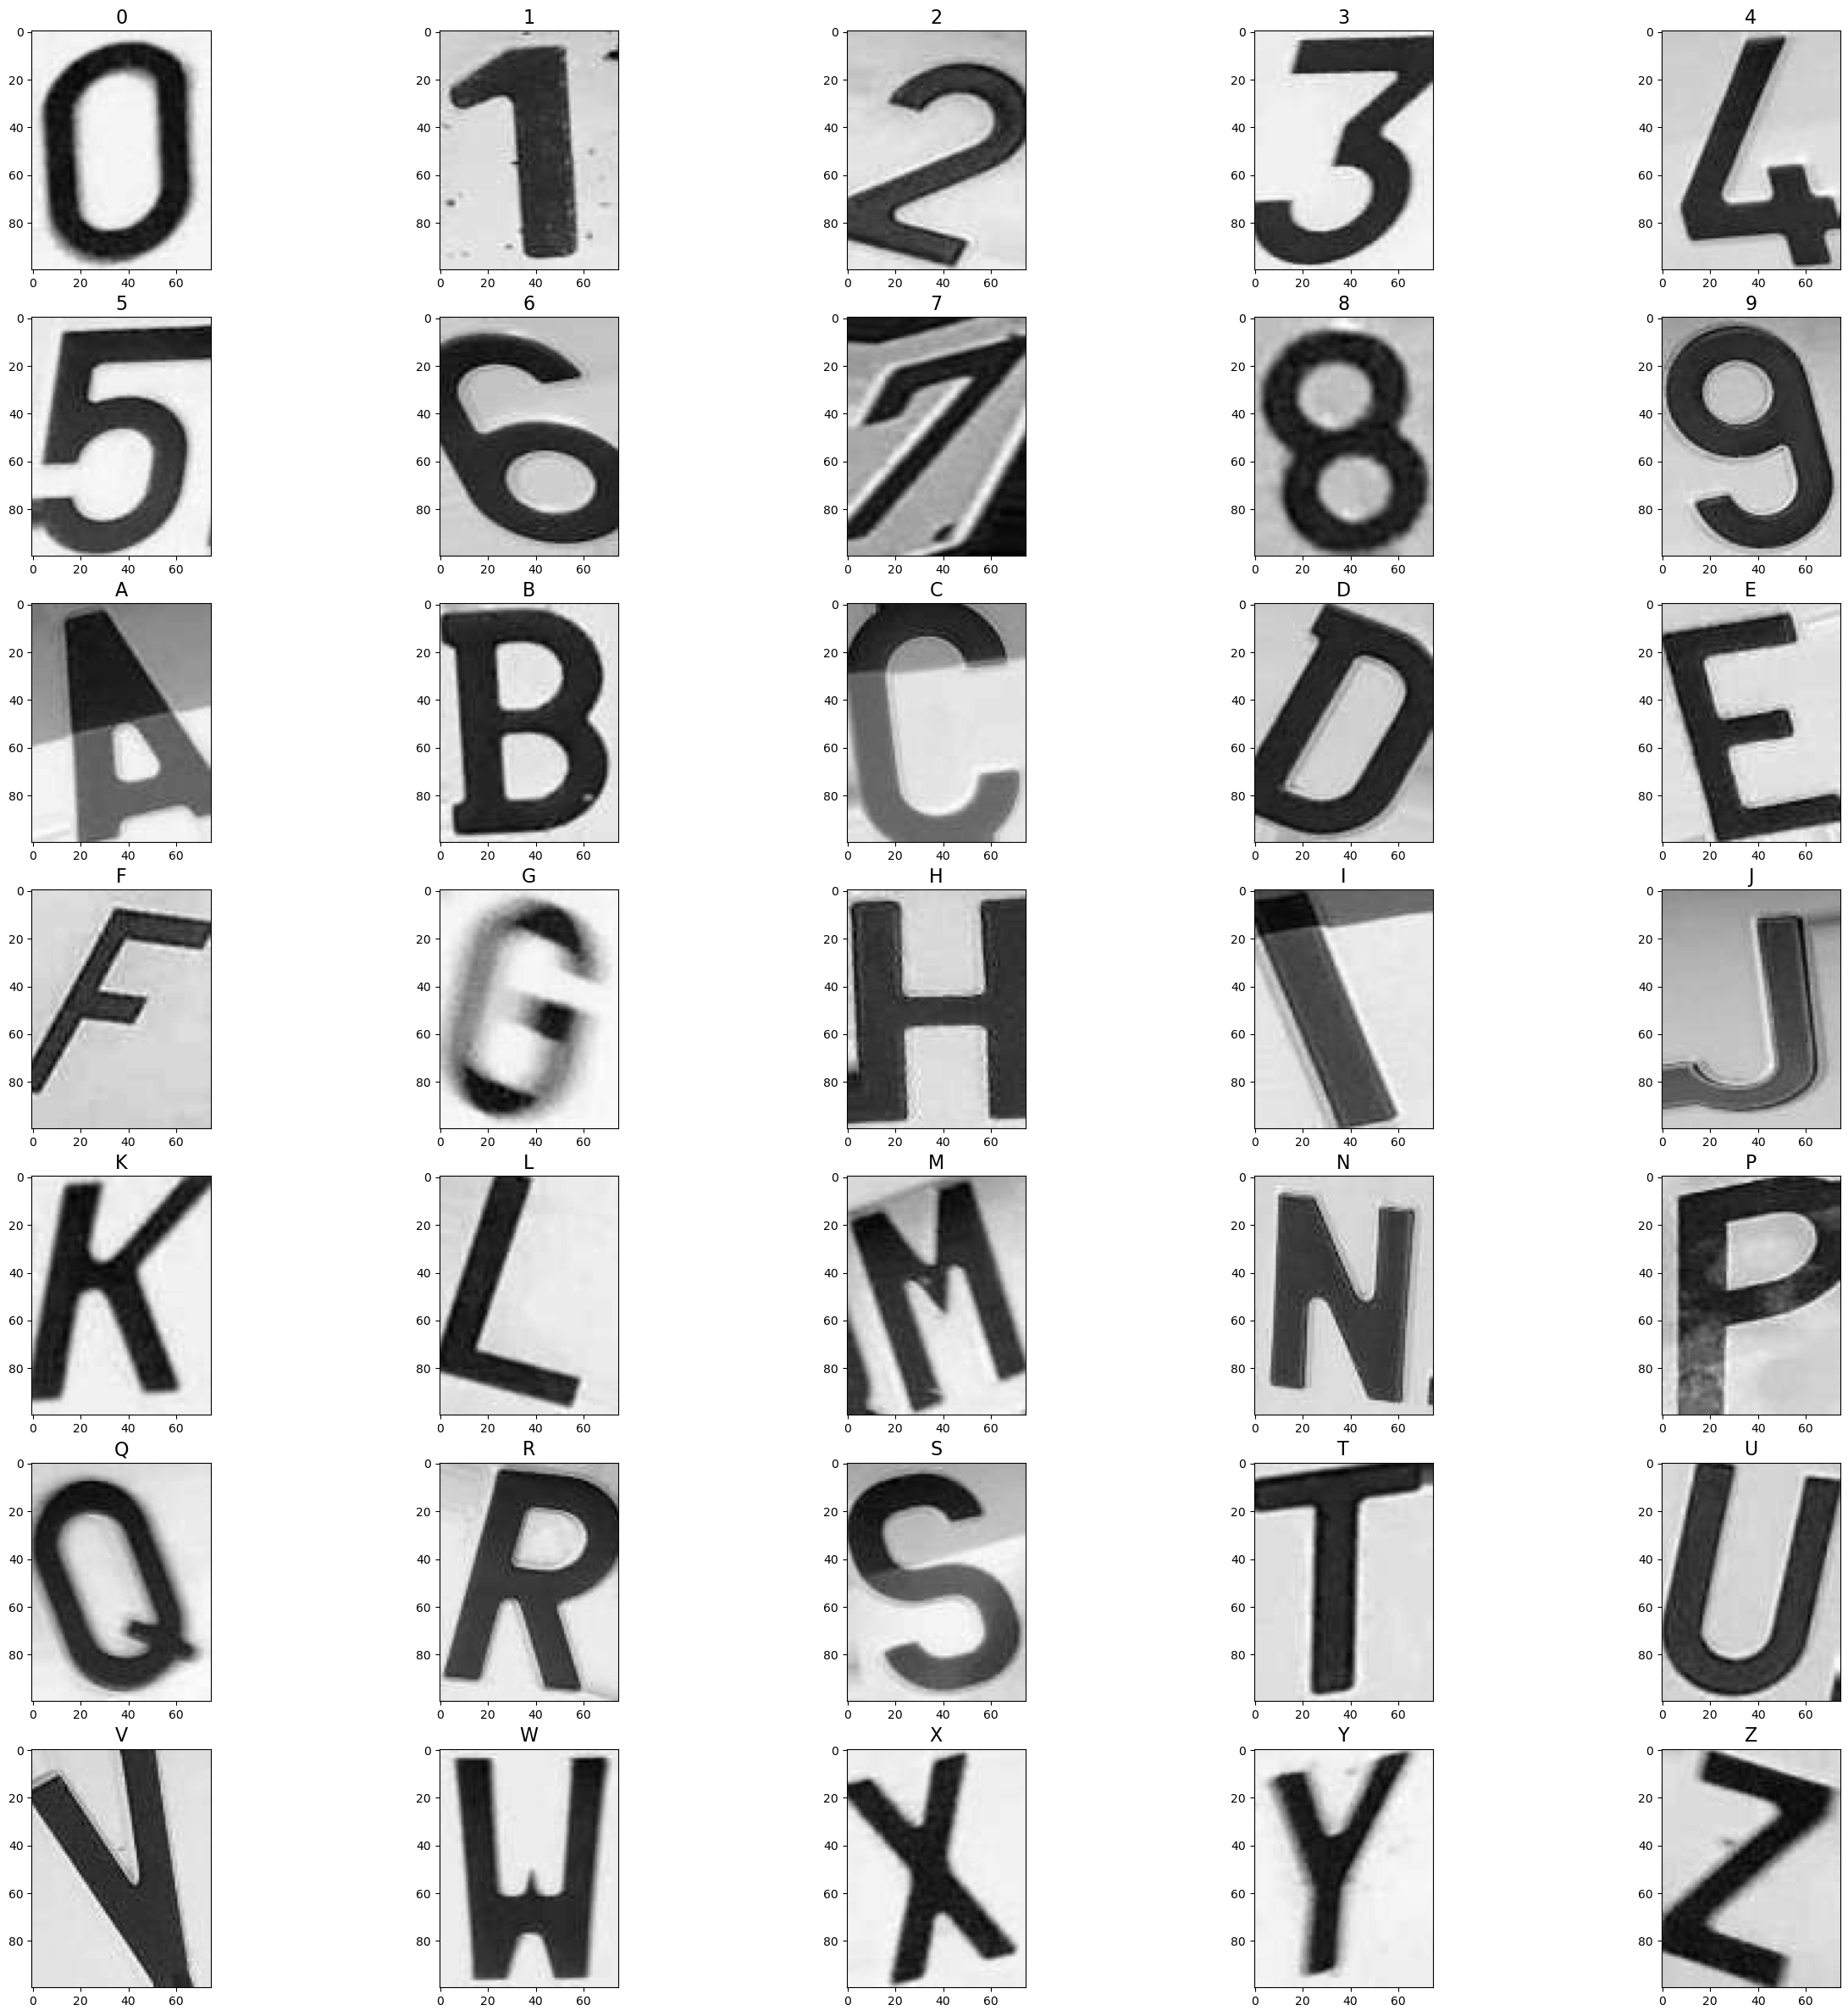

In [7]:
rows, columns = 7, 5

k = 0
fig, axes = plt.subplots(rows, columns, figsize=(30, 30))
for row in range(rows):
    for column in range(columns):
        rand_num = np.random.randint(0, digits_counter[digits[k]])
        class_path = dir_path + '/' + str(digits[k])
        image_path = class_path + '/' + str(os.listdir(class_path)[rand_num])
        ax = axes[row, column]
        ax.set_title(digits[k], loc='center', fontsize=16)
        ax.imshow(imread(image_path), cmap='gray')
        k += 1
plt.show()

In [9]:
data = []
labels = []
MAX_NUM = None   # maximum number of digits images per class
IMG_WIDTH, IMG_HEIGHT = 32, 40

# images of digits '6' in folder with '2'
incorrect_img = [
    'aug20121_0.jpg',
    'aug20122_1.jpg',
    'aug20123_2.jpg',
    'aug20124_3.jpg',
    'aug20125_4.jpg',
    'aug20126_5.jpg',
    'aug20127_6.jpg',
    'aug20128_7.jpg',
    'aug20129_8.jpg',
    'aug20130_9.jpg'
]

for digit in digits:
    path = os.path.join(dir_path, digit)
    label = digits.index(digit)
    for img in os.listdir(path):
        if img in incorrect_img:
            continue
        img_path = os.path.join(path, img)
        img_array = cv.imread(img_path)
        resized = cv.resize(img_array, (IMG_WIDTH, IMG_HEIGHT), interpolation = cv.INTER_AREA)
        gray = cv.cvtColor(resized, cv.COLOR_RGB2GRAY)        
        data.append(gray)
        labels.append(label)
        if MAX_NUM is not None:
            if labels.count(label) == MAX_NUM:
                break

data = np.array(data, dtype='float32')
labels = np.array(labels, dtype='int8')

In [10]:
print(data.shape)

(35490, 40, 32)


In [13]:
#Normalizing the data
data = data / 255.0
data = data.reshape(*data.shape, 1)
labels = to_categorical(labels, num_classes=NUM_CLASSES)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, shuffle=True, test_size=.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, shuffle=True, test_size=.3)

print("Training dataset shape: ", X_train.shape, y_train.shape)
print("Validation dataset shape: ", X_val.shape, y_val.shape)
print("Testing dataset shape: ", X_test.shape, y_test.shape)

Training dataset shape:  (17390, 40, 32, 1) (17390, 35)
Validation dataset shape:  (7453, 40, 32, 1) (7453, 35)
Testing dataset shape:  (10647, 40, 32, 1) (10647, 35)


In [17]:
model = tf.keras.Sequential([
    Flatten(input_shape=(40, 32, 1)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dense(35,activation='softmax')
])

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
history = model.fit(X_train, y_train,
                    epochs=15, batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0895 - loss: 3.4621 - val_accuracy: 0.1991 - val_loss: 3.2755
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4380 - loss: 2.2867 - val_accuracy: 0.4895 - val_loss: 2.7956
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6866 - loss: 1.6148 - val_accuracy: 0.6941 - val_loss: 2.1653
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8007 - loss: 1.1863 - val_accuracy: 0.8108 - val_loss: 1.5007
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8552 - loss: 0.8918 - val_accuracy: 0.8570 - val_loss: 1.0325
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8847 - loss: 0.7047 - val_accuracy: 0.8866 - val_loss: 0.7354
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9045 - loss: 0.5758 - val_accuracy: 0.9076 - val_loss: 0.5727
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9217 - loss: 0.4787 - val_accuracy: 0.9128 - val_loss:

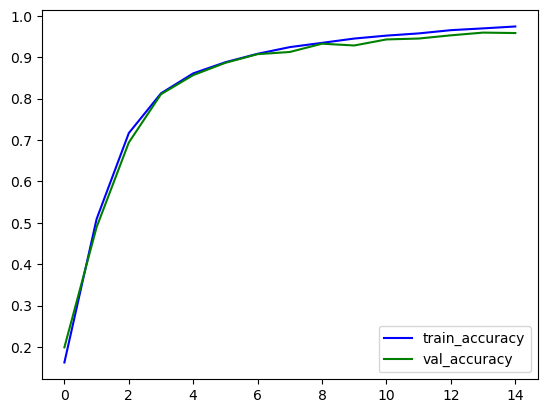

In [23]:
hist=history.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [25]:
model.evaluate(X_val,y_val)

233/233 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9561 - loss: 0.2169


[0.20913192629814148, 0.9585402011871338]

In [27]:
model.evaluate(X_test,y_test)

333/333 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9629 - loss: 0.2012  


[0.20666871964931488, 0.9611157774925232]

In [31]:
#CNN
input_layer=Input(shape=(40,32,1))
layer=Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="valid")(input_layer)
layer=MaxPool2D(pool_size=(2,2),strides=(1,1))(layer)
layer=BatchNormalization()(layer)

layer=Flatten()(layer)

layer=Dense(64,activation="relu")(layer)
layer=BatchNormalization()(layer)

layer=Dense(32,activation="relu")(layer)
output_layer=Dense(35,activation="softmax")(layer)
model2=Model(inputs=input_layer,outputs=output_layer)
model2.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 40, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 38, 30, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 29, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 37, 29, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 17168)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,098,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 35)             │         1,155 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,102,531 (4.21 MB)

 Trainable params: 1,102,371 (4.21 MB)

 Non-trainable params: 160 (640.00 B)

In [33]:
model2.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [35]:
history2 = model2.fit(X_train, y_train,
                    epochs=15, batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.2386 - loss: 2.8912 - val_accuracy: 0.0742 - val_loss: 3.3587
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.6912 - loss: 1.6918 - val_accuracy: 0.0538 - val_loss: 3.2652
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.8460 - loss: 1.2558 - val_accuracy: 0.0895 - val_loss: 3.1031
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9217 - loss: 0.9429 - val_accuracy: 0.1860 - val_loss: 2.8221
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9572 - loss: 0.7248 - val_accuracy: 0.3421 - val_loss: 2.4630
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9736 - loss: 0.5640 - val_accuracy: 0.6395 - val_loss: 1.9883
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9842 - loss: 0.4379 - val_accuracy: 0.8427 - val_loss: 1.5056
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9911 - loss: 0.3426 - val_accuracy: 0.9373 - v

In [115]:
model2.compile(loss='categorical_crossentropy',
       optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
       metrics=['accuracy'])

In [117]:
history2 = model2.fit(X_train, y_train,
                    epochs=15, batch_size=256,
                    validation_data=(X_val, y_val))

Epoch 1/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.9998 - loss: 0.0757 - val_accuracy: 0.9930 - val_loss: 0.1001
Epoch 2/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9999 - loss: 0.0499 - val_accuracy: 0.9938 - val_loss: 0.0773
Epoch 3/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9999 - loss: 0.0350 - val_accuracy: 0.9940 - val_loss: 0.0625
Epoch 4/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 1.0000 - loss: 0.0262 - val_accuracy: 0.9934 - val_loss: 0.0578
Epoch 5/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 1.0000 - loss: 0.0196 - val_accuracy: 0.9948 - val_loss: 0.0480
Epoch 6/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.9946 - val_loss: 0.0420
Epoch 7/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 1.0000 - loss: 0.0122 - val_accuracy: 0.9950 - val_loss: 0.0380
Epoch 8/15
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 1.0000 - loss: 0.0102 - val_accuracy: 0.9946 - v

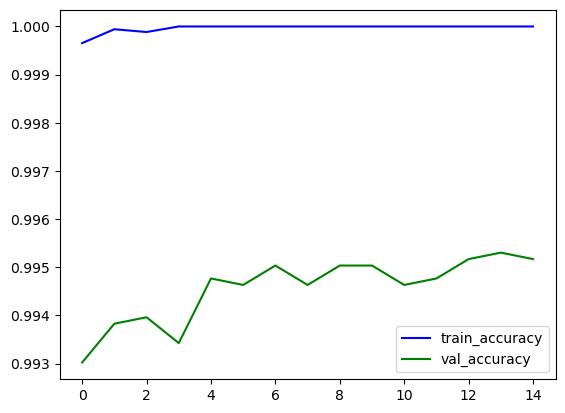

In [119]:
hist=history2.history
plt.plot(hist["accuracy"],color="b",label="train_accuracy")
plt.plot(hist["val_accuracy"],color="g",label="val_accuracy")
plt.legend(loc="lower right")
plt.show()

In [121]:
model2.evaluate(X_val,y_val)

233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9954 - loss: 0.0228


[0.024486219510436058, 0.9951697587966919]

In [122]:
model2.evaluate(X_test,y_test)

333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9968 - loss: 0.0201


[0.023066779598593712, 0.9952099323272705]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class for MLP: 0


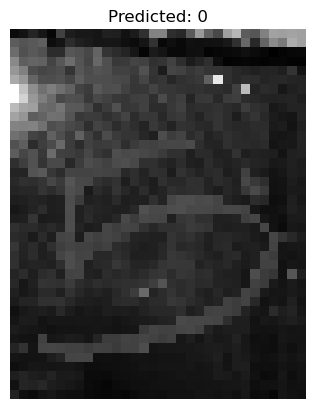

In [133]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your test image
image_path = r'C:\Users\karri\Documents\A_N_P_R\data\test_data_set\5_2.jpg'

# Load the image using OpenCV
img = cv2.imread(image_path)
if img is None:
    print("Image not found.")
else:
    # Resize the image to 32x40 (width x height)
    resized_img = cv2.resize(img, (32, 40))
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    # Normalize pixel values to [0,1]
    normalized_img = gray_img / 255.0
    # Reshape to match the model input shape (40,32,1)
    input_img = normalized_img.reshape(40, 32, 1)
    # Expand dimensions to add the batch size dimension: (1,40,32,1)
    input_img = np.expand_dims(input_img, axis=0)
    
    # Predict using the trained MLP model (assumed to be named 'model')
    prediction = model.predict(input_img)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    print("Predicted class for MLP:", predicted_class)
    
    # Optionally, display the image and prediction
    plt.imshow(gray_img, cmap='gray')
    plt.title("Predicted: {}".format(predicted_class))
    plt.axis('off')
    plt.show()
